In [81]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import random
%matplotlib inline

## Probality Theory
> Генеральная совокупность — вся изучаемая выборочным методом статистическая совокупность объектов и/или явлений общественной жизни (единиц отбора), имеющих общие качественные признаки или количественные переменные. Выборочная совокупность (выборка) — представительная часть генеральной совокупности.

> Дополнение события - это событие, которое не произойдет. Вероятность того, что событие A не произойдет, обозначается P(A'). Вероятность того, что события A и B произойдут одновременно, - это вероятность пересечения A и B. Вероятность пересечения событий A и B обозначается P(A ∩ B).

> Intersection	P(A ∩ B)
Probability of A and B
Union	P (A∪B)
Probability of A or B


### Матожидание 
![Формула матожидание]('https://cdn.uznaychtotakoe.ru/images/m-x-p-xi-xi-correcta-cke.jpg')
> m = ∑xipi - наиболее ожидаемое значение вероятности

In [234]:
# First variant to solve - Сумма попарных *
quanily = [2, 12, 3]
costs = [12.5, .5, 1.75]

partial_cost = []
for q, c in zip(quanily, costs):
    partial_cost.append(q * c)

print(sum(partial_cost))

36.25


In [236]:
# Second variant to solve
quanily = [2, 12, 3]
costs = [12.5, .5, 1.75]

partial_cost = [q * c for q, c in zip(quanily, costs)]

print(sum(partial_cost))

36.25


In [237]:
# Third variant 
quanily = np.array([2, 12, 3])
costs = np.array([12.5, .5, 1.75])

np.sum(quanily * costs)

36.25

In [243]:
# Взвесить каждый элемент 
values = np.array([10.0, 20.0, 30.0])
weights = np.full_like(values, 1/3)
val1 = np.array([10.0, 20.0, 30.0, 15.0, 16.0])

weights2 = np.full_like(val1, 1/5)
weights2

array([0.2, 0.2, 0.2, 0.2, 0.2])

In [270]:
# Simple game
payoff = np.array([1.0, -.5]) 
probs = np.array([.49, .51])
np.dot(payoff, probs) # матожидание 

0.235

In [272]:
def is_even(value:float):
    return value % 2 == 0

winnings = 0.0
for t in range(1000000):
    die_toss = np.random.randint(1,7)
    winnings += 1.0 if is_even(die_toss) else -.5
    
winnings

249115.0

In [274]:
# Сумма квадратов 
values1 = np.array([-5, -3, -2,10])
squares = values1 * values1
print(squares, sum(squares))

[25  9  4  1] 39


In [275]:
# Ошибка и пример 
errors = np.array([5, -5, 3.2, -1.1])
error_df = pd.DataFrame({'errors': errors,'squared':errors * errors})
error_df

,errors,squared
0,5.0,25.00
1,-5.0,25.00
2,3.2,10.24
3,-1.1,1.21


### Моделирование Монте-Карло
> Монте-Карло – это группа математических методов, которые используют генератор случайных чисел и применяют для моделирования процессов с неопределенностью. 
> Они эффективны для расчета бизнес-рисков и прогнозирования неблагоприятных событий, например перерасхода средств или отставания от графика.

> Метод был разработан американскими учеными Станиславом Уламом и Джоном фон Нейманом во время их секретной работы в рамках Манхэттенского проекта по созданию ядерного оружия в 1940-х годах. 
> Само название «Монте-Карло» появилось из-за необходимости присвоить методу кодовое слово. Хотя метод имеет отношение к случайным величинам, назвали его так не случайно.

> Коллега Улама, Николас Метрополис, предложил назвать разработанный метод в честь широко известного района княжества Монако. Существует предположение, что его вдохновила история о дяде Улама, который на деньги родственников играл в казино Монте-Карло. Название прижилось, а метод получил широкое распространение.
> Сегодня Монте-Карло используется в моделировании и помогает более эффективно принимать решения и строить точные долгосрочные прогнозы.

### Flipping Coin 
> Метод Монте-Карло: В общем случае это получение случайных значений из эксперимента. Другими словами, повторение одних и тех же процедур снова и снова и вычисление их вероятности.
> В этом учебнике мы начнем с подбрасывания монеты, поскольку в справедливом случае есть два случая (голова и решка), где каждый имеет 50% процент.


В дальнейшем для получения количества голов и хвостов по отдельности мы вычислили. Для этого мы можем использовать простую функцию суммирования матрицы, которая даст количество единиц в эксперименте. Затем просто вычтем эти единицы, чтобы получить нули, следующим образом,

In [82]:
def coint_flip():
    return random.randint(0, 1)

result_l = []

def monte_carlo(n):
    plt.subplots(figsize = (12,9))
    result = 0
    
    for i in range(n):
        flip_result = coint_flip()
        result = result +  flip_result
        
        prob_var = result / (i + 1)
        
        result_l.append(prob_var)
        
    plt.axhline(y = 0.5, color = 'r', linestyle = '-')
    plt.xlabel('Iterations')
    plt.ylabel('Probability')
    plt.plot(result_l)
    return result / n

Find value:  0.504


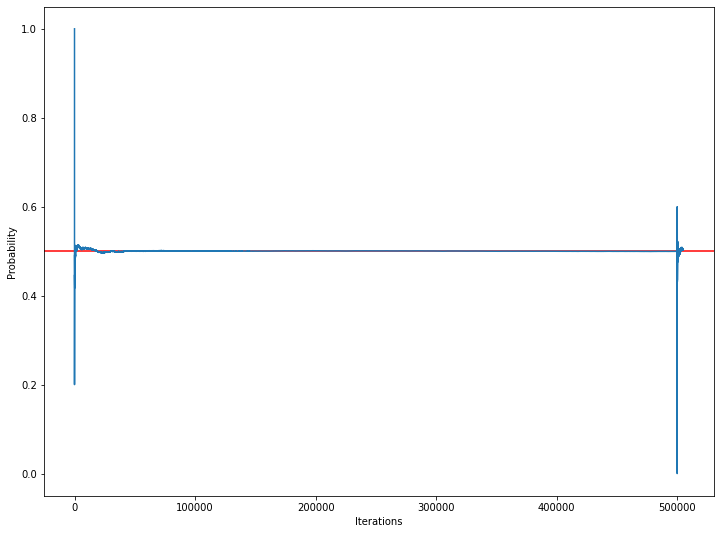

In [84]:
answear = monte_carlo(5000)
print('Find value: ',answear)

## Попадание в круг


In [7]:
m = input('Enter integer value: ')
n = 0 # попаданий в точку 
import math 
import random 
for i in range(int(m)):
    x = random.random()
    y = random.random()
    print(x, y)
    if math.sqrt(x ** 2 + y ** 2) < 1:
        n += 1

pi = 4 * n / int(m)
print(pi)


Enter integer value: 15
0.12124810260504548 0.11020548600757685
0.2175737721388945 0.8980676354071242
0.13422338066356365 0.411839062552808
0.14089880315184855 0.5402867861583891
0.8425179337683998 0.5756297417600695
0.7904516809411554 0.7411054112534834
0.7469705958614782 0.14981653323681632
0.9440927431026952 0.2986626655904475
0.6029704695666995 0.022347058121772734
0.4182378356300972 0.9328015070125137
0.7087645821115391 0.70669097661346
0.5722434922153904 0.35920365796551457
0.2352402206930605 0.42408173124285653
0.9765072386615192 0.6176559769291481
0.7988725320276292 0.667457163304727
2.4


## Проблема Монти Холла
> Парадокс впервые был сформулирован американским математиком Стивом Селвином ещё в 1975 году, но широкую известность он приобрёл благодаря популярному игровому шоу «Давайте заключим сделку». В честь ведущего этой телевикторины, которого звали Монти Холл, парадокс и получил своё название.
В чём же суть парадокса Монти Холла?

> Представьте, что перед вами три двери, как показано на рисунке ниже. За двумя дверьми находятся козы, за одной — автомобиль. Надо угадать дверь с автомобилем, и он ваш.

### Выгодно ли менять дверь ?
![Выбор двери](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3f/Monty_open_door.svg/640px-Monty_open_door.svg.png)

> 1/3 - car 1/3 - goat 1/3 - goat

## Выбрали одну дверь и получили результатм с 1/3 до 2/3
![Выбор после открытие одной двери](https://miro.medium.com/max/1400/0*2VPhlzymLpGTrzG3.png)

Winning prob if you always switch:  0.688
Winning prob if you stay original choise:  0.312


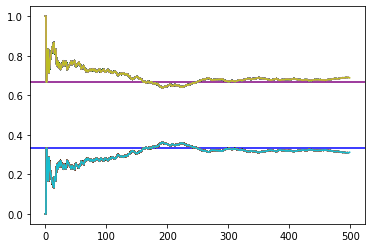

In [16]:
doors = ['goat', 'goat', 'car']

switch_win_prob = []
stick_win_prob = []

plt.axhline(y = 0.6666, color = 'purple', linestyle = '-')
plt.axhline(y = 0.3333, color = 'b', linestyle = '-')

def monte_carlo(n):
    
    switch_wins = 0
    stick_wins = 0
    
    for i in range(n):
        
        random.shuffle(doors)
        
        k = random.randrange(2)
        
        if doors[k] != 'car':
            switch_wins += 1
        else:
            stick_wins += 1
        
        switch_win_prob.append(switch_wins / (i + 1))
        stick_win_prob.append(stick_wins / (i + 1))
        
        plt.plot(switch_win_prob)
        plt.plot(stick_win_prob)
        
    print('Winning prob if you always switch: ',switch_win_prob[-1])
    print('Winning prob if you stay original choise: ',stick_win_prob[-1])
        
monte_carlo(500)

### Rules 
    1. В мешочке лежат карточки с числами от 1 до 100
    2. Пользователь делает ставку четное или нечетное
    3. 10, 11 - спец числа где 10 - нечет, 11 - чет
    4. Если вы ставите на четное число и получаете 10, вы проигрываете
    5. Если вы ставите на нечетное число и получаете 11, вы проигрываете

Even or Odd: Odd
All tries:  [18000, 6000, -4000, 20000, -4000, -6000, 4000, 18000, 14000, 12000]
Player start with 10000 each time 10
Total capital after all ties:  78000


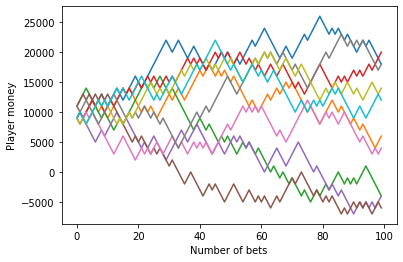

In [43]:
choice = input('Even or Odd: ')
if choice == 'Even':
    def pick_note():
        
        note = random.randint(1, 101)
        
        # проверяем условие игры
        
        if note % 2 != 0:
            return False 
        elif note % 2 == 0:
            return True

elif choice == 'Odd':
    def pick_note():
        
        note = random.randint(1, 101)
        
        # проверяем условие игры
        if note % 2 == 0 :
            return False
        elif note % 2 == 1:
            return True
         
# Функция главной игры
def play(total_money, bet_money, total_plays):
    
    num_of_plays = []
    money = []
    
    play = 1
    
    for play in range(total_plays):
        if pick_note():
            
            total_money = total_money + bet_money
            num_of_plays.append(play)
            money.append(total_money)
        
        else:
            total_money = total_money - bet_money
            
            num_of_plays.append(play)
            
            money.append(total_money)
        
    plt.ylabel('Player money')
    plt.xlabel('Number of bets')
    plt.plot(num_of_plays, money)
    plt.grid()
    final_funds.append(money[-1])
    return final_funds

final_funds = []

start_capital = 10000
bet_strategy = 1000

number_of_tries = 10 # дней когда ходили попыток


number_of_games_attended_each_try = 100 # количество игр

for i in range(number_of_tries):
    end_fund = play(start_capital, bet_strategy
                    , number_of_games_attended_each_try)
    
print('All tries: ', end_fund)
print(f'Player start with {start_capital} each time {number_of_tries}') # del squares

print('Total capital after all ties: ', sum(end_fund))

#print('Capital change in percent:', sum(end_fund) / len(end_fund) - start_capital) * 100

In [42]:
even = []
odd = []

for i in range(1, 1001):
    if i % 2 == 0:
        even.append(i)
    elif i % 2 == 1:
        odd.append(i)
        
sum_even = sum(even)
sum_odd = sum(odd)
print(len(even), len(odd))

500 500


## Распределение вероятностей
> Распределение вероятностей является одним из основных понятий теории вероятностей и используется в основном для выражения закона вероятности случайных величин. Для удобства использования, согласно различным типам случайных величин, распределение вероятностей принимает различные проявления.
>Распределение вероятностей включает в себя дискретное распределение вероятностей и непрерывное распределение вероятностей.
    >>Дискретные данные: данные состоят из отдельных значений, каждое из которых имеет соответствующую вероятность.
    >>Непрерывные данные: данные охватывают диапазон, и любое значение в этом диапазоне может стать результатом события.

![](https://habrastorage.org/getpro/habr/post_images/4f6/5f4/edb/4f65f4edb921715dbb56a320a65b101e.png)

## Распределение Бернулли 
Пусть исход события может принимать одно из двух значений 0 или 1 с вероястностями p и q соотвественно,
тогда распределение вероятности получения каждого из предложенных исходов будет называться распределением Бернулли


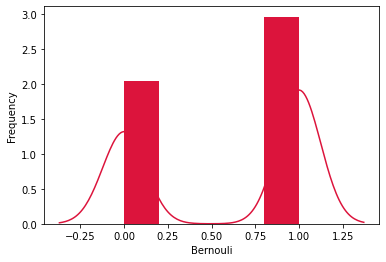

In [111]:
from scipy.stats import bernoulli


data_bern = bernoulli.rvs(size=1000, p=0.6)

ax = sns.distplot(data_bern,
                  kde=True,
                  color='crimson',
                  hist_kws={"linewidth": 25,'alpha':1})

ax.set(xlabel='Bernouli', ylabel='Frequency');


In [123]:
r = stats.bernoulli.rvs(p = 0.7, size = 1000)
r[:100]

array([1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1])

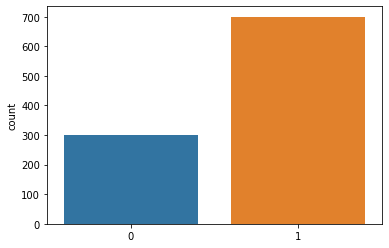

In [124]:
sns.countplot(x = r);

## Биномиальное распределение 
> Биномиальное распределение - количество k успехов в n испытаниях, исход расперелен по Бернулли с вероятностью успеха p(возвращаем значение в коризу). описывается биномиальным распределением 
> Это распределение интенсивно используется в картах контроля качества. p - доля годной продукции, q - доля браков


In [142]:
n, p = 10, 0.3

sample = stats.binom(n = n, p = p).rvs(size = 200)

mean, var, skew, kurt = stats.binom.stats(n, p, moments = 'mvsk')

# var - дисперсия
# skew - коэфициент ассиметрии 
# kurt коэффицие́нт эксце́сса


print('Первые 10 значений выборки:\n', sample[:10])
print('Выборочное среднее: %.3f' % sample.mean())
print('Выборочное среднее: %.3f' % sample.var())
print(mean, var, skew, kurt)

Первые 10 значений выборки:
 [2 2 3 3 3 1 6 1 4 4]
Выборочное среднее: 2.950
Выборочное среднее: 2.098
3.0 2.0999999999999996 0.27602622373694174 -0.12380952380952373


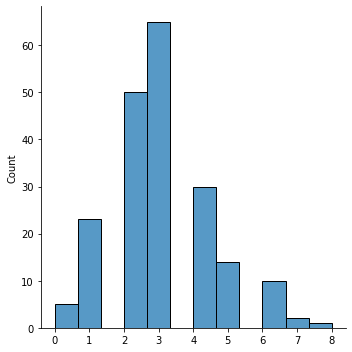

In [143]:
sns.displot(data = sample);

>Геометрическое распределение - это вероятность первого успеха в эксперименте Бернулли n раз, только k экспериментов.

>Характеристики геометрического распределения:
    > 1. Провести серию независимых экспериментов,
    > 2. Каждый эксперимент имеет как вероятность успеха, так и вероятность неудачи, и вероятность успеха одного эксперимента одинакова
    > 3. В основном, сколько экспериментов необходимо для достижения первого успеха

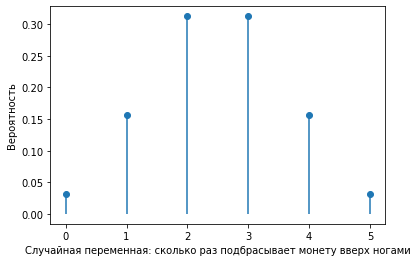

In [147]:
# Шаг 1, определите случайную величину: 5 раз подбрасываете монету, сколько раз лицом вверх
n2 = 5 # Количество раз что-то сделать
p2 = 0.5 # Вероятность успеха при выполнении чего-либо (вероятность перевернуть монетку вверх дном)
X2 = np.arange(0, n2 + 1,1) # Количество раз, чтобы преуспеть в чем-то (количество раз подбрасывая монетку вверх ногами)


 # Шаг 2, найти вероятность соответствующего распределения: функция качества вероятности (PMF)
 # Возвращаем список, каждый элемент в списке представляет вероятность соответствующего значения в случайной переменной
pList2 = stats.binom.pmf(X2,n2,p2)


'''
 Шаг 3, рисование
 График рисует полилинии по умолчанию
 маркер: форма точки, значение o указывает, что точка является маркером круга (круговой маркер)
 linestyle: форма линии, значение None означает, что ломаная, соединяющая точки, не отображается
'''
plt.plot(X2,pList2,marker='o',linestyle='None')

'''
 vlines используется для рисования вертикальных линий,
 Описание параметра: vline (значение координаты x, минимальное значение координаты y, максимальное значение координаты y)
 X, который мы передаем, является массивом, который рисует вертикальную линию для каждого значения координаты x в массиве,
 Минимальное значение координаты y вертикальной линии равно 0, а максимальное значение координаты y соответствует значению в pList2
'''
plt.vlines(X2,0,pList2)
plt.xlabel('Случайная переменная: сколько раз подбрасывает монету вверх ногами')
plt.ylabel('Вероятность')
plt.show()

2.0 2.0 2.1213203435596424 6.5


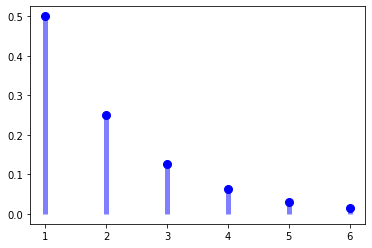

In [149]:
fig, ax = plt.subplots(1,1)

p = 0.5
mean, var, skew, kurt = stats.geom.stats(p, moments = 'mvsk')

# var - дисперсия
# skew - коэфициент ассиметрии 
# kurt коэффицие́нт эксце́сса

x = np.arange(stats.geom.ppf(0.01, p),
              stats.geom.ppf(0.99, p))

ax.plot(x, stats.geom.pmf(x, p), 'bo', ms = 8, label = 'geom pmf')
ax.vlines(x, 0, stats.geom.pmf(x,p), colors = 'b', lw = 5, alpha = 0.5)
print(mean, var, skew, kurt)

## Распределение Пуассона
> Распределение Пуассона описывает среднее число событий за известный период времени и находит вероятность возникновения в течение определенного периода времени.
Особенности:
 > 1. Индивидуальное время происходит случайным образом в пределах данного интервала и происходит независимо. Данный интервал может составлять пространство или время
 > 2. Известно, что среднее число случаев возникновения событий в этом интервале (или называемый уровень заболеваемости) является конечным числом. Среднее число вхождений этого события указано греческим алфавитом (лямбда).
 
 > Задача: Случай: Известно, что частота аварий на определенном перекрестке составляет 2 раза в день, так какова вероятность того, что здесь будет k аварий в день?

X4: [0 1 2 3 4]
pList4 [0.13533528 0.27067057 0.27067057 0.18044704 0.09022352]


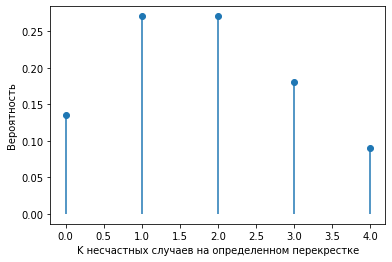

In [154]:
# Шаг 1, определить случайные величины
mu4 = 2 # Среднее: 2 несчастных случая в день
k4 = 4 # раза, теперь я хочу знать вероятность 4 несчастных случаев каждый день

# Количество несчастных случаев, в том числе 0, 1, 2, 3 и 4 несчастных случая
X4 = np.arange(0,k4+1,1)

'''
 Шаг 2: Найти вероятность соответствующего распределения: функция вероятности массы (PMF)
 Возвращает список, где каждый элемент в списке представляет вероятность соответствующего значения в случайной переменной
 Соответственно укажите вероятность 0, 1, 2, 3 и 4 несчастных случаев
'''

pList4 = stats.poisson.pmf(X4,mu4)
pList4
print('X4:',X4)
print('pList4',pList4)

 # Шаг 3, рисование
plt.plot(X4,pList4,marker='o',linestyle='None')
plt.vlines(X4,0,pList4)
plt.xlabel('K несчастных случаев на определенном перекрестке')
plt.ylabel( 'Вероятность')

plt.show()



## Нормальное распределение
> Нормальное распределение - также известное как Гауссово распределение (Гауссово распределение), нормальная кривая имеет форму колокола, два конца, средняя высота является двусторонне симметричной, а центральное министерство имеет самую высокую плотность вероятности. По мере удаления от среднего плотность вероятности уменьшается.
Если случайная величина x следует нормальному распределению с математическим ожиданием μ и дисперсией σ2, то это N (μ, σ2). 
> Его функция плотности вероятности представляет собой ожидаемое значение нормального распределения μ, определяет его положение, а его стандартное значение σ определяет амплитуду распределения. Когда μ = 0, σ = 1, нормальное распределение является стандартным нормальным распределением.
> Функция плотности вероятности f (x): ее можно использовать для определения вероятности непрерывной переменной в диапазоне данных, который может указывать форму распределения вероятности.
> Плотность вероятности: область указывает вероятность в различных диапазонах и описывается функцией плотности вероятности.
Шаги для определения вероятности нормального распределения:
> 1. определить распределение и диапазон, то есть вычислить среднее и стандартное отклонение;
> 2. стандартизируйте распределение и найдите стандартную оценку; 
> 3. Найти вероятность. Нормальную вероятность можно найти, посмотрев стандартную оценку в таблице вероятностей. Таблица вероятности дает вероятность, равную или меньшую этого значения.

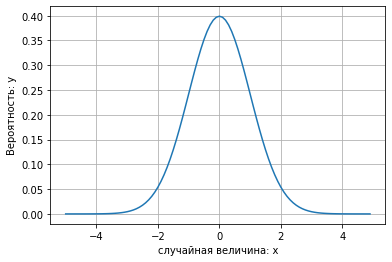

In [40]:
# Шаг 1, определить случайные величины
mu5 = 0 # среднее
sigma = 1 # стандартное отклонение
X5 = np.arange(-5,5,0.1)

 # Шаг 2, найти функцию плотности вероятности (PDF)
y = stats.norm.pdf(X5,mu5,sigma)
#print('X5:',X5)
#print('y:',y)

 # Шаг 3, рисование
plt.plot(X5,y)
plt.xlabel('случайная величина: x')
plt.ylabel('Вероятность: у')
plt.grid()
plt.show()



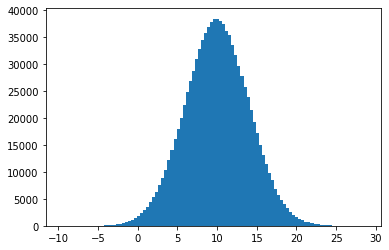

In [85]:
x = np.random.normal(loc = 10, scale = 4, size = 1000000)
plt.hist(x, bins = 100)
plt.show()

### Slide 15
> X1and X2are random variables of the results of rolling 2 fair dice. 
> Use a numpy simulation to show the distribution of the sum of the dice, i.e. X1+ X2.

In [50]:
quanily = np.array([2, 12, 3])
costs = np.array([12.5, .5, 1.75])

np.sum(quanily * costs)

36.25

### Slide 16 
> X1and X2are random variables of the results of rolling 2 fair dice. 
> Use a numpy simulation to show the distribution of the sum of the dice, i.e. X1+ X2.

### Slide 18
> X1, X2and X3are random variables of the results of rolling 3 fair dice.
> Use a numpy simulation to show the distribution of:
 1. P(X1+ X2+ X3)
 2. P(X1+ X2+ X3| X3= 4)
 3. P(X1+ X2+ X3| X1+ X2= 4)
 4. Explain the results.

### Slide 27
> Design and implement a Monte Carlo experiment to estimate the value of pi.